In [86]:
import numpy as np
from sklearn.manifold import Isomap, MDS
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

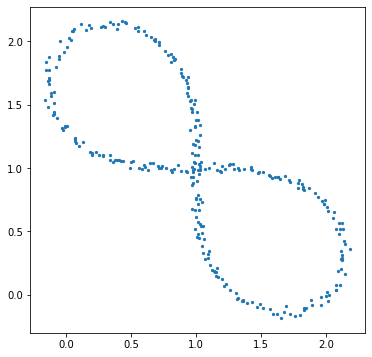

In [87]:
t = np.linspace(0, 2*np.pi, 300)
a = 1
b = 2
x = a * np.sqrt(2) * np.cos(t) / (np.sin(t)**2 + 1)
y = b * np.sqrt(2) * np.cos(t) * np.sin(t) / (np.sin(t)**2 + 1)

# Add 5% uniform noise to x and y
noise = 0.05
x += np.random.uniform(low=-noise, high=noise, size=len(x))
y += np.random.uniform(low=-noise, high=noise, size=len(y))

y *= 0.5

t_rotate = rotate(list(zip(x,y)), origin=(0, 0), degrees=-45)

x = [i[0] + 1 for i in t_rotate]
y = [i[1] + 1 for i in t_rotate]

plt.figure(figsize=(6,6))
# Plot the lemniscate with noise
plt.scatter(x, y, s=5)
plt.show()

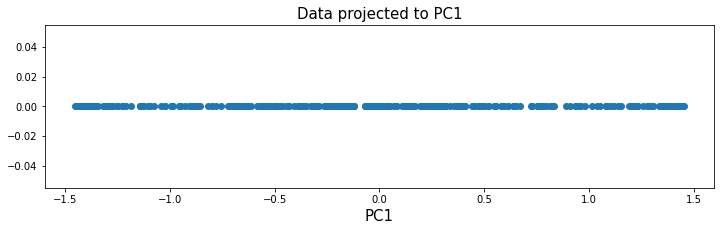

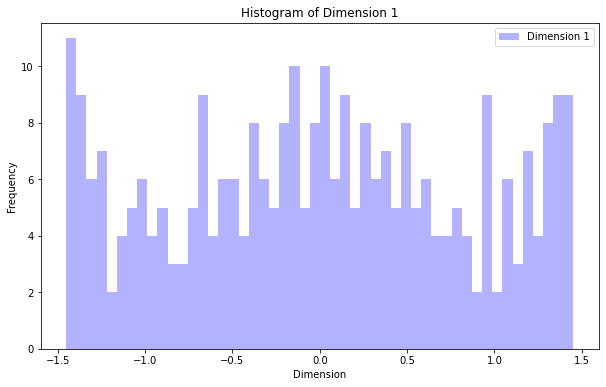

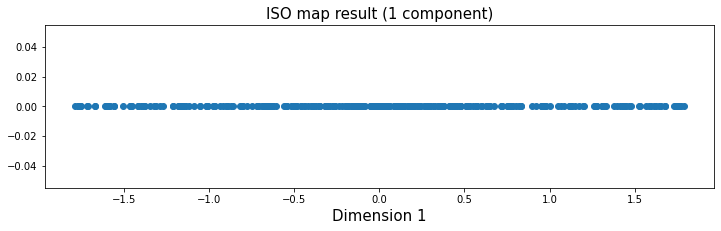

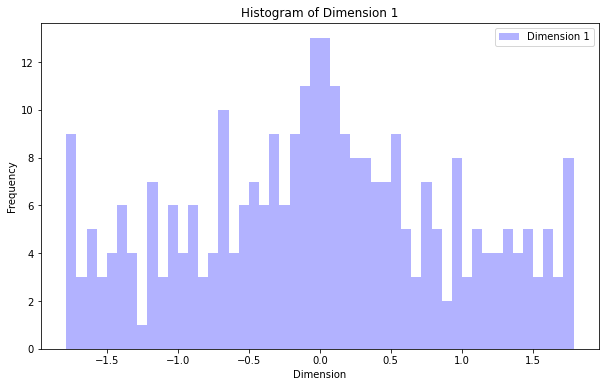

In [88]:
# PCA
dataMatrix = np.vstack((x, y)).T
pca = PCA(n_components=1)
embedding = pca.fit_transform(dataMatrix)

plt.figure(figsize=(12,3))
# Plot the one-dimensional embedding
plt.scatter(embedding[:,0], np.zeros(embedding[:,0].size))

# Add the axis labels and title
plt.xlabel('PC1',fontsize=15)
plt.title('Data projected to PC1',fontsize=15)

# Show the plot
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='Dimension 1')
#plt.hist(embedding[:, 1], bins=20, alpha=0.3, color='green', label='Dimension 2')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1')
plt.legend()
plt.show()

# ISOMAP
# Apply Isomap to reduce the data to two dimensions
iso = Isomap(n_components=1, n_neighbors=20)
embedding = iso.fit_transform(dataMatrix)

#print(embedding)
plt.figure(figsize=(12,3))
plt.scatter(embedding[:,0], np.zeros(embedding[:,0].size))
plt.xlabel('Dimension 1',fontsize=15)
plt.title('ISO map result (1 component)',fontsize=15)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='Dimension 1')
#plt.hist(embedding[:, 1], bins=20, alpha=0.3, color='green', label='Dimension 2')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1')
plt.legend()
plt.show()

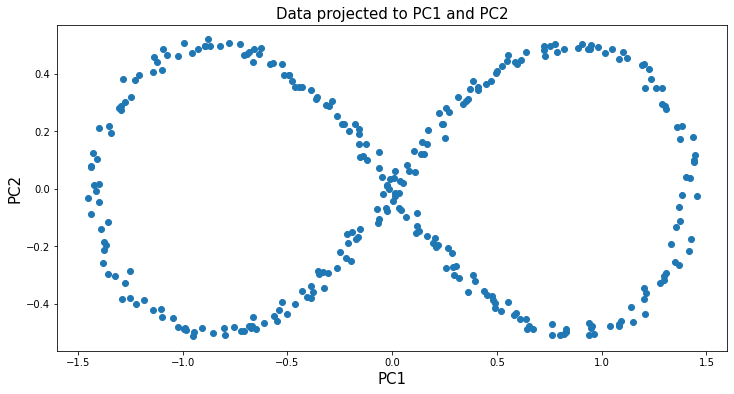

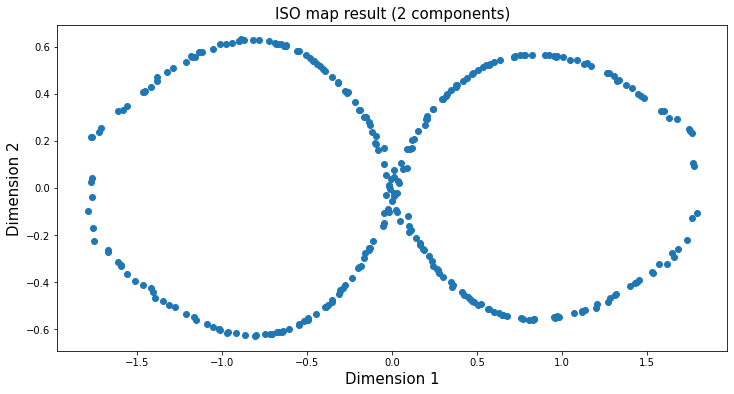

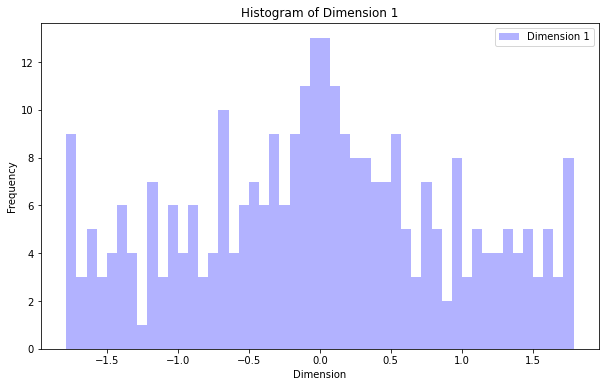

In [89]:
# PCA
dataMatrix = np.vstack((x, y)).T
pca = PCA(n_components=2)
embedding = pca.fit_transform(dataMatrix)

plt.figure(figsize=(12,6))
# Plot the one-dimensional embedding
plt.scatter(embedding[:,0], embedding[:,1], alpha=1)

# Add the axis labels and title
plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.title('Data projected to PC1 and PC2',fontsize=15)

# Show the plot
plt.show()


# ISOMAP
# Apply Isomap to reduce the data to two dimensions
iso = Isomap(n_components=2, n_neighbors=20)
embedding = iso.fit_transform(dataMatrix)

plt.figure(figsize=(12,6))
plt.scatter(embedding[:,0], embedding[:,1])
plt.xlabel('Dimension 1',fontsize=15)
plt.ylabel('Dimension 2',fontsize=15)
plt.title('ISO map result (2 components)',fontsize=15)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(embedding[:, 0], bins=50, alpha=0.3, color='blue', label='Dimension 1')
#plt.hist(embedding[:, 1], bins=20, alpha=0.3, color='green', label='Dimension 2')
plt.xlabel('Dimension')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1')
plt.legend()
plt.show()


# MDS